In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import os
warnings.filterwarnings("ignore")
train_df=pd.read_csv('archive.zip')
train_df.columns#sütün isimleri
from sklearn.model_selection import train_test_split,StratifiedGroupKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import os

#train_test_split --------------	Veriyi eğitim ve test kümelerine ayırır.
#StratifiedGroupKFold-----------	Dengeli çapraz doğrulama yapar.
#GridSearchCV-------------------	Hiperparametre optimizasyonu yapar.
#LogisticRegression--------------   Doğrusal sınıflandırma yapar.
#SVC----------------------------	Destek vektör makineleri kullanarak sınıflandırma yapar.
#RandomForestClassifier---------	Karar ağaçlarından oluşan bir topluluk modeli kullanır.
#KNeighborsClassifier-----------	En yakın komşuları kullanarak tahmin yapar.
#DecisionTreeClassifier---------	Karar ağacı kullanarak sınıflandırma yapar.
#VotingClassifier---------------	Birden fazla modeli birleştirerek tahmin yapar.
#accuracy_score-----------------	Modelin doğruluk oranını hesapla


In [115]:
train_df.head()#ilk beş satır

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
train_df.describe()#istatistik

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
def bar_plot(variable):
    var=train_df[variable]
    varvalue=var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varvalue.index,varvalue)
    plt.xticks(varvalue.index,varvalue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varvalue))


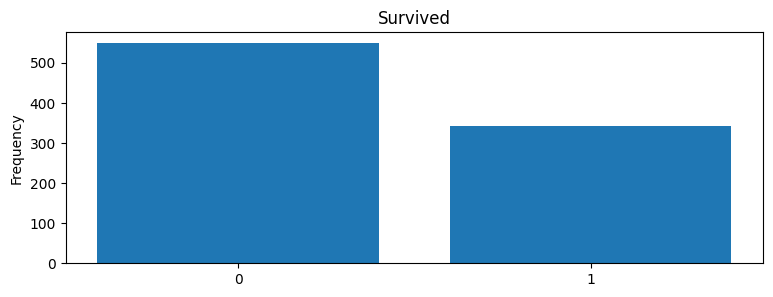

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


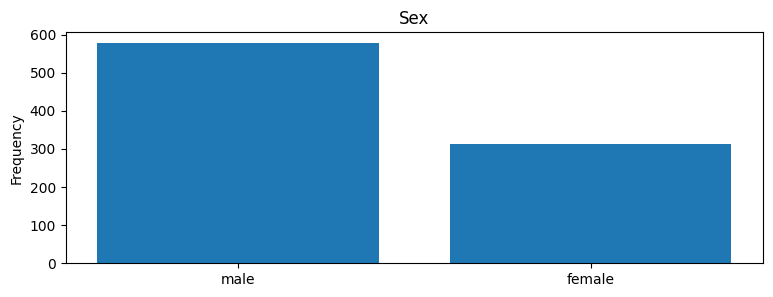

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


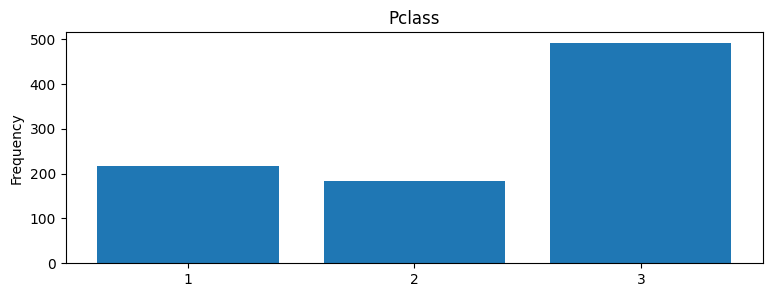

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


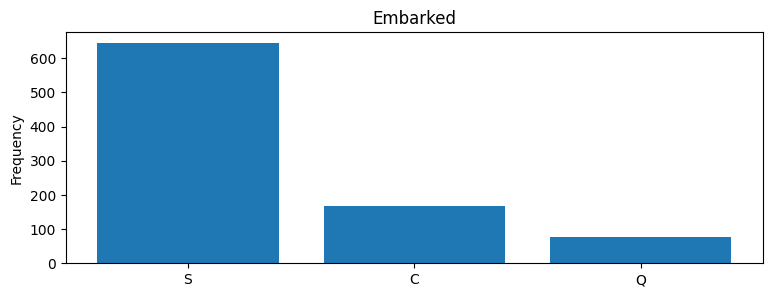

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


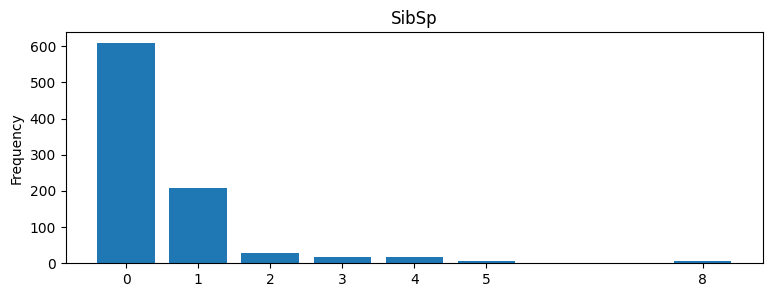

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


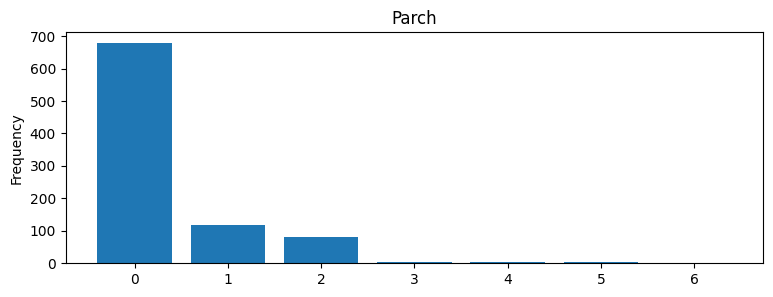

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [119]:
categori1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in categori1:
    bar_plot(c)
   

In [120]:
categori2=["Cabin","Name","Ticket"]
for c in categori2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 

Ticket
347082              7
1601                7
CA. 2343            7
3101295             

In [121]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubution with hist".format(variable))
    plt.show()

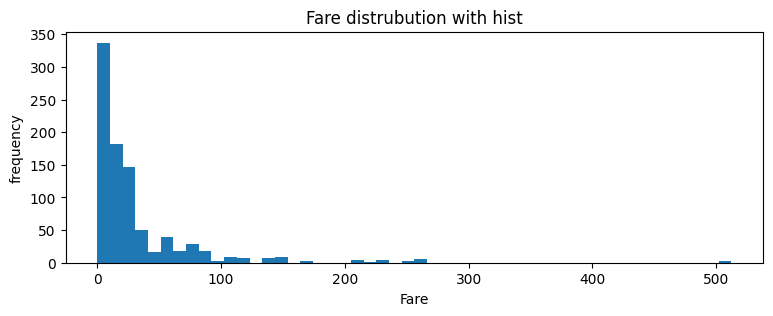

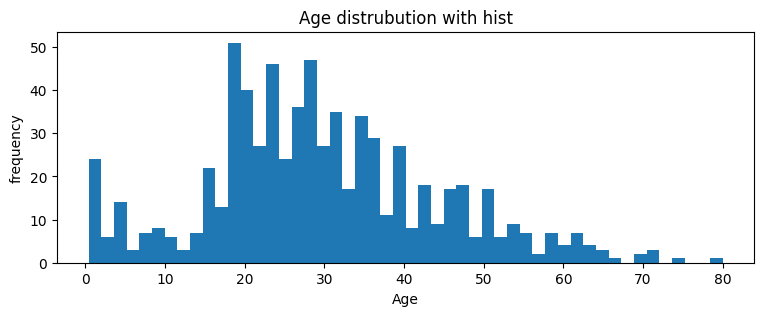

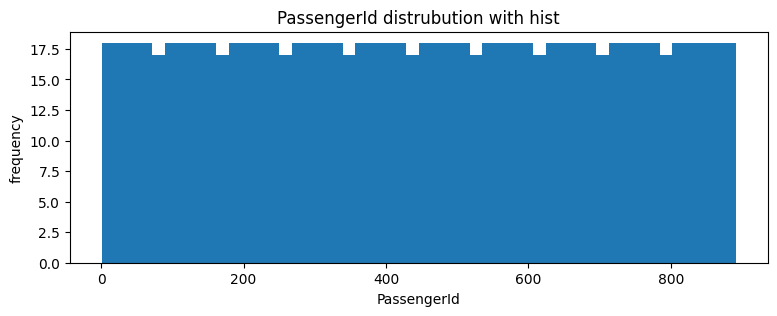

In [122]:
numuricvar=["Fare","Age","PassengerId"]
for n in numuricvar:
    plot_hist(n)

In [123]:
#plcass  ve Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [124]:
#sex ve survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [125]:
#Sibsp ve survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [126]:
#Parch ve survived
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [127]:
import numpy as np
from collections import Counter
def detect_outliers(df,features):
    outlier_indeces=[]

    for c in features:

        Q1=np.percentile(df[c],25)

        Q3=np.percentile(df[c],75)
        IQR=Q3-Q1
        outlier_step=IQR*1.5
        outlier_list_col=df[(df[c]<Q1 -outlier_step) | (df[c]>Q3+outlier_step)].index

        outlier_indeces.extend(outlier_list_col)
    outlier_indeces=Counter(outlier_indeces)
    multiple_outliers=list(i for i,v in outlier_indeces.items() if v>2  )
        
    return multiple_outliers

In [128]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [129]:
train_df=train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

In [130]:
# MİSSİNG Value
#fid missing value
#fill missing value

In [131]:
train_df_len=len(train_df)

In [132]:
train_df.columns[train_df.isnull().any()]


Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [133]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [134]:
#FİLLL MİSSİNG VALUE
#EMBARKED HAS 2 MİSSİNG VALUE Nun OLAN DEĞERLERİ DOLDURMA İLK OLARAK AZ OLANI DOLDURMA

In [135]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


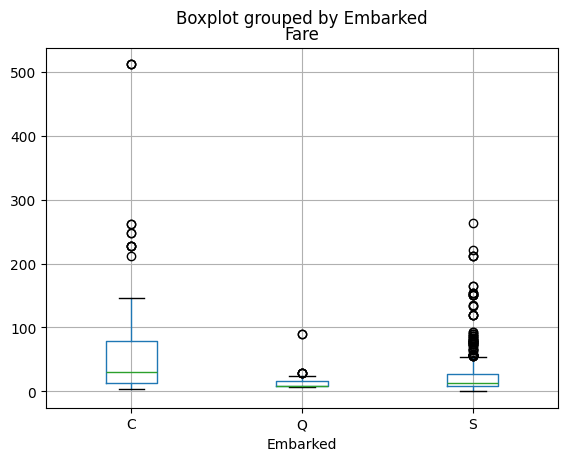

In [136]:
#Embarked Nan değerlerini doldurmak için (en uygun olanı) bir grafik seçimi
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [137]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [138]:
#VİSUALİZATİON

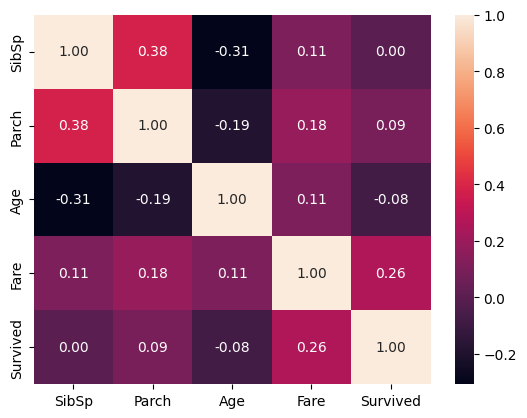

In [139]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")
plt.show()

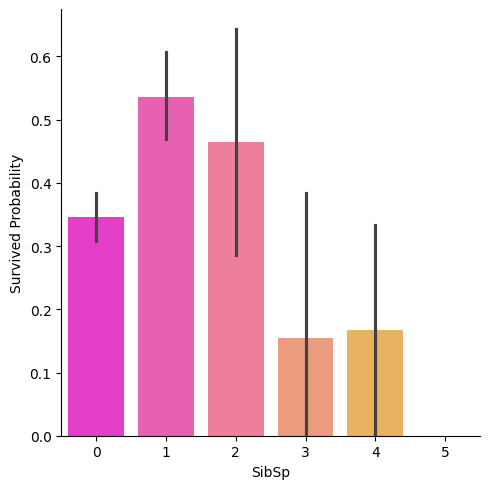

In [140]:
#SibSp--Survived
g=sns.catplot(x="SibSp",y="Survived",data=train_df,kind="bar",palette="spring")
g.set_ylabels("Survived Probability")
plt.show()

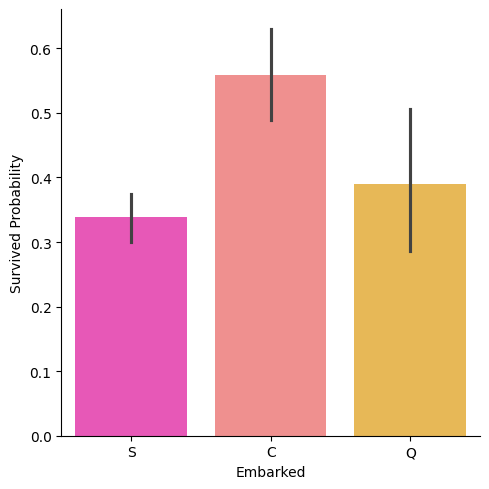

In [141]:
k=sns.catplot(x="Embarked",y="Survived",data=train_df,kind="bar",palette="spring")
k.set_ylabels("Survived Probability")
plt.show()

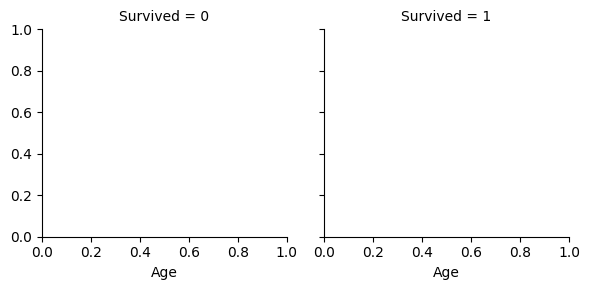

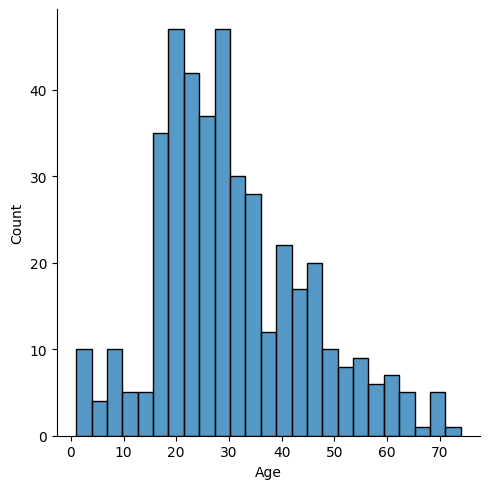

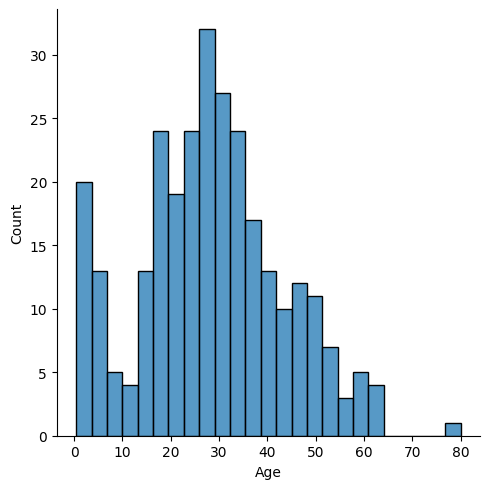

In [142]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(sns.displot,"Age",bins=25)
plt.show()

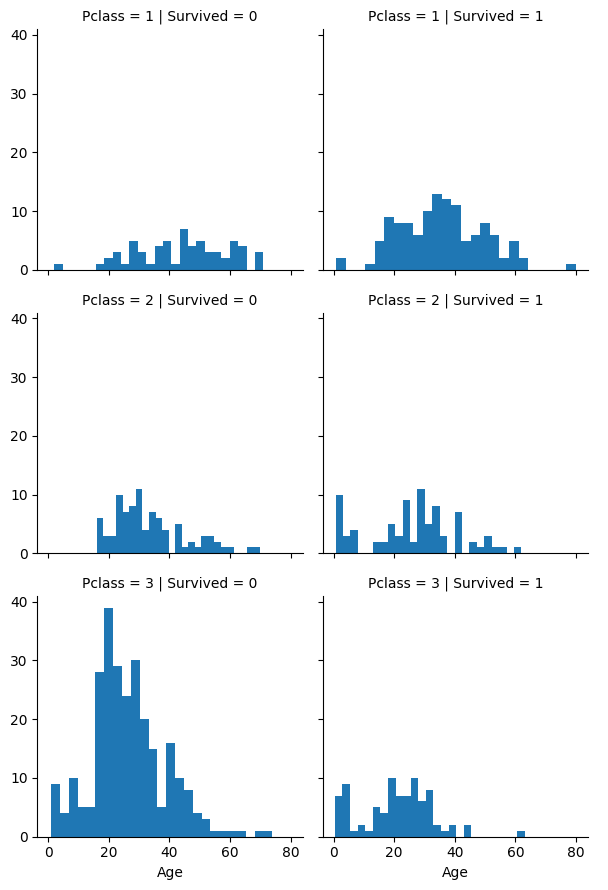

In [143]:
#Pclass-Survived-Age

m=sns.FacetGrid(train_df,col="Survived",row="Pclass")
m.map(plt.hist,"Age",bins=25)
m.add_legend()
plt.show()

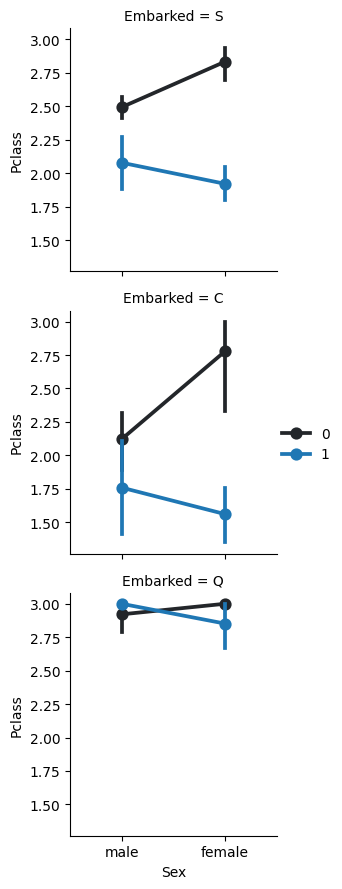

In [144]:
#Embarked -- Sex -- Pclass --Survived
m=sns.FacetGrid(train_df,row="Embarked")
m.map(sns.pointplot,"Sex","Pclass","Survived")
m.add_legend()
plt.show()

In [145]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


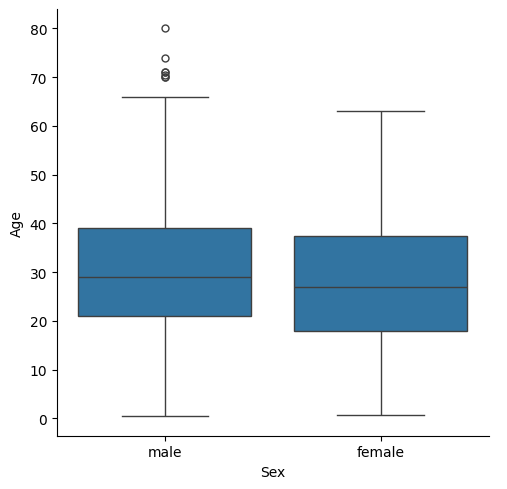

In [146]:
sns.catplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

In [147]:
#FEATURE ENGİNEEERİNG(ÖZ NİTELİK MÜHENDİSLİĞİ)


In [148]:
#NAME----TİTLE
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [149]:
name=train_df["Name"]
train_df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(20)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Title, dtype: object

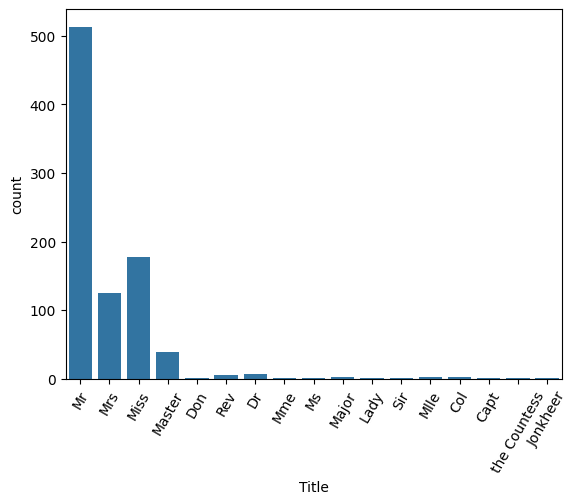

In [150]:
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [151]:
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "other")
train_df["Title"] = [0 if i == "Master" else 1 if i in ["Miss", "Ms", "Mrs"] else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)




0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

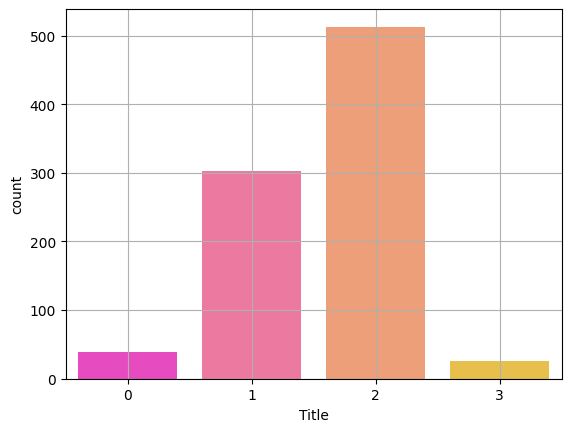

In [152]:
sns.countplot(x="Title",data=train_df,palette="spring")
plt.grid(True)
plt.show()

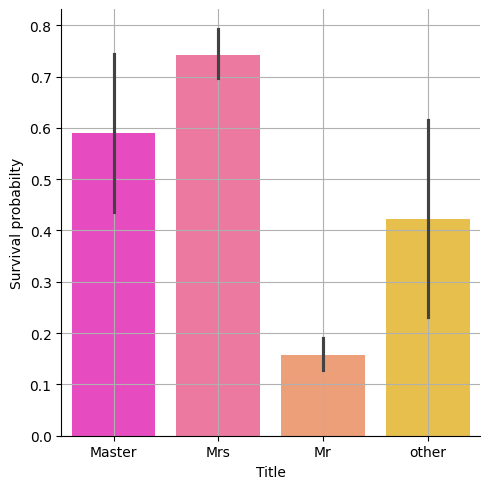

In [153]:
g=sns.catplot(x="Title",y="Survived",data=train_df,kind="bar",palette="spring")
g.set_xticklabels(["Master","Mrs","Mr","other"])
g.set_ylabels("Survival probabilty")
plt.grid(True)
plt.show()

In [154]:
#Artık bizim elimizde Title diye bir veri olduğu için Name adlı sütünü silelim
train_df.head(5) #bu veri setinde Name vardı fakat şimdi yok
train_df.drop(labels=["Name"],axis=1,inplace=True)
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [155]:
train_df=pd.get_dummies(train_df,columns=["Title"])#kategorik değerleri numerik değere çevirme
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [156]:
#FAMİLY SİZE ben dahail ailemden kaç kişi titanic gemisindedir
train_df["Fsize"]=train_df["SibSp"]+train_df["Parch"]+1
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


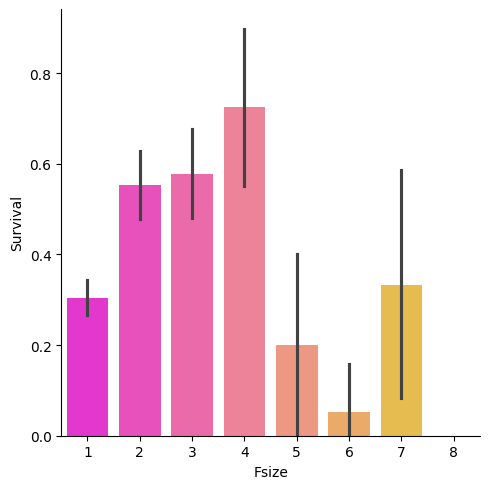

In [157]:
g=sns.catplot(x="Fsize",y="Survived",data=train_df,kind="bar",palette="spring")
g.set_ylabels("Survival")
plt.show()

In [158]:
train_df["Family_size"]=[1 if i<5  else 0 for i in train_df["Fsize"]]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1


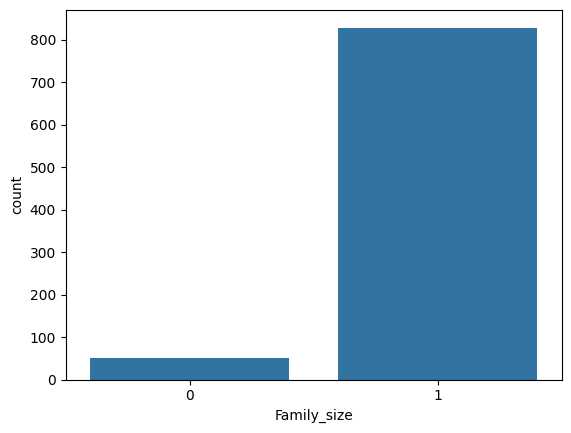

In [159]:
sns.countplot(x="Family_size",data=train_df)#0 ve 1 dağılımına bakma
plt.show()

In [160]:
train_df=pd.get_dummies(data=train_df,columns=["Family_size"])#numerik değere çevirme 0 ve 1(False,True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


In [161]:
#EMBARKED

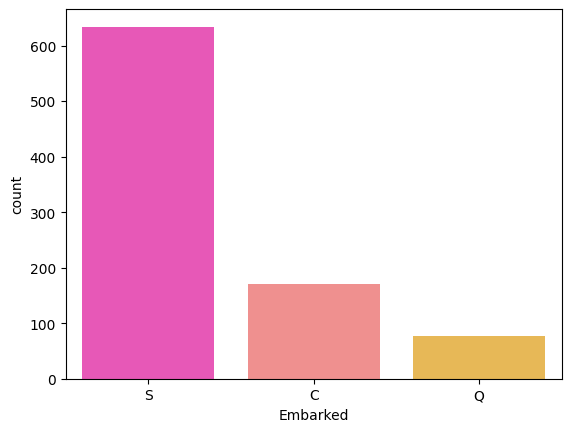

In [162]:
sns.countplot(x="Embarked",data=train_df,palette="spring")
plt.show()

In [163]:
train_df=pd.get_dummies(data=train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [164]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

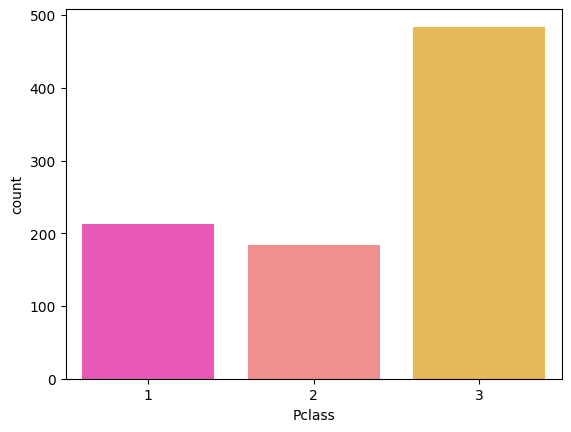

In [165]:
#PCLASS
sns.countplot(x="Pclass",data=train_df,palette="spring")
plt.show()

In [166]:

train_df["Pclass"]=train_df["Pclass"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,...,Title_3,Fsize,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,A/5 21171,7.2500,NaN,False,...,False,2,False,True,False,False,True,False,False,True
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,False,...,False,2,False,True,True,False,False,True,False,False
2,3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,...,False,1,False,True,False,False,True,False,False,True
3,4,1,female,35.0,1,0,113803,53.1000,C123,False,...,False,2,False,True,False,False,True,True,False,False
4,5,0,male,35.0,0,0,373450,8.0500,NaN,False,...,False,1,False,True,False,False,True,False,False,True


In [167]:
#SEX
train_df["Sex"]=train_df["Sex"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,...,Family_size_0,Family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,...,False,True,False,False,True,False,False,True,False,True
1,2,1,38.0,1,0,PC 17599,71.2833,C85,False,True,...,False,True,True,False,False,True,False,False,True,False
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,...,False,True,False,False,True,False,False,True,True,False
3,4,1,35.0,1,0,113803,53.1000,C123,False,True,...,False,True,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,373450,8.0500,NaN,False,False,...,False,True,False,False,True,False,False,True,False,True


In [168]:
#DROP PESSENGERL END CABİN ID
train_df.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)
train_df.drop(labels=["Fsize"],axis=1,inplace=True)
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Family_size_0', 'Family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [169]:
train=train_df[:train_df_len]
X_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 590
X_test 291
y_train 590
y_test 291


In [170]:
legreg=LogisticRegression()
legreg.fit(X_train,y_train)
acc_log_train=round(legreg.score(X_train,y_train)*100,2)
acc_log_test=round(legreg.score(X_test,y_test)*100,2)#100 çarpmamızın nedeni yüzdelik formata çevir ve , sonra iki basamak olcak şekilde ayarlamak
print("Trainin Accuacy: % {}".format(acc_log_train))
print("Test Accuacy: % {}".format(acc_log_test))

ValueError: could not convert string to float: 'SCO/W 1585'